# Two sample proportion z-intervals, hypothesis testing 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.stats
from scipy.stats import bernoulli
from scipy.stats import norm

To calculate the confidence interval of the difference between two populations, we calculate a margin of error with this format:

p<sub>1</sub> - p <sub>2</sub> $\pm$ z<sup>*</sup> $\sigma$ <sub>p1-p2</sub> <br>

where z<sup>*</sup> is the critical value of the standard normal distribution <br>
$\sigma$ <sub>p1-p2</sub> is the standard deviation of the sampling distribution of the difference in proportion <br>

$\sigma_{p1-p2} = \sqrt{\sigma_{p1}^2 + \sigma_{p2}^2}$

where: $\sigma$ <sup>2</sup><sub>p1</sub> = $\frac{p1*(1-p1)}{N}$
* note that the proportion for each population is used to calculate its own sampling distribution standard deviation

## Example Problem:
There are two populations, p1 and p2, p1 has a sample size of 120 and p2 has a sample size of 140. There are 54 people in p1 in favor of the lunch menu and 77 from p2. Construct a 90% confidence interval to estimate the difference between p1 and p2 proportion in favor of lunch. 

There are 3 sampling distributions:
1) sampling distribution for p1
2) sampling distribution for p2 
3) sampling distribution for p1-p2

In [84]:
p1 = 54/120
p2 = 77/140
pdiff = p2 - p1
p_overall = (54 + 77)/(120 + 140)

In [85]:
p = 0.05
num_samples = 100000
sample_size = 1000
data = bernoulli(p).rvs(num_samples)

In [86]:
def rand_sample_calc_mean(num_samples, sample_size, population):
    mean_list = np.zeros(num_samples)
    for n in range(num_samples):
        random_sample = np.random.choice(population, size = sample_size, replace = True)
        mean_list[n] = np.mean(random_sample)
    return mean_list

In [87]:
sampling_distribution = rand_sample_calc_mean(5000, 100, data)

In [88]:
p_overall

0.5038461538461538

[]

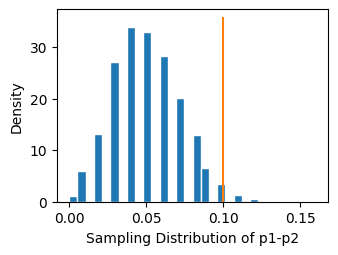

In [89]:
# Plot sampling distribution for 100 samples, each with N = 100
fig, ax = plt.subplots(figsize=(3.5, 2.5))

count, bins1, ignored = ax.hist(sampling_distribution, 30, density=True, edgecolor='white')
ax.set_xlabel('Sampling Distribution of p1-p2')
ax.set_ylabel('Density')

ylim = plt.gca().get_ylim()
ax.plot([pdiff, pdiff], ylim)

plt.plot()


In [90]:
# for 90% confidence interval remembere that this leaves 5% of either side, so you're looking at 0.05 percentile onn the percent point function (inverse of cdf — percentiles)
critical_value_90 = norm.ppf(.05, loc = 0, scale = 1)
print(critical_value_90)

-1.6448536269514729


In [91]:
var_p1 = p1*(1-p1)/120
var_p2 = p2*(1-p2)/140

the standard error for a diff between two groups = sqrt(var_group_1 + var_group_2) because we are assuming that these two groups are from drawn randomly from indepedent populations

In [92]:
margin_of_error =  -critical_value_90 * np.sqrt(var_p1 + var_p2)
margin_of_error

0.10179979221346554

# Hypothesis Testing

for 2 sample proportions.

Given Group A, proportion = 132/400 and Group B, proportion = 228/600 what is the probability of observing this difference, assuming null hypothesis is true? <br>

H<sub>0</sub>: p<sub>A</sub> - p<sub>B</sub> = 0 <br>
H<sub>1</sub>: p<sub>A</sub> - p<sub>B</sub> != 0

Find: <br>
P ( p<sub>A</sub> - p<sub>B</sub> >= 0.06 | H<sub>0</sub> = True)



In [51]:
pdiff_AB = abs((132/400) - (228/600))
print(pdiff_AB)

0.04999999999999999


Text(0.5, 0, 'Population Data assuming null is true')

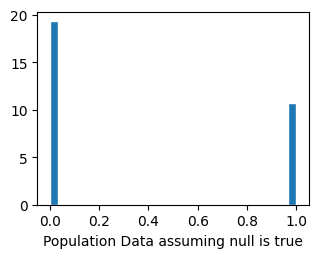

In [78]:
# simulate the null hypothesis, which assumes null is true, which means that the two samples come from the sample population 
p_all = (132 + 228)/1000 # overall proportion of the two sample, is used to approximate population proportion
data = bernoulli(p_all).rvs(num_samples)

fig, ax = plt.subplots(figsize=(3.5, 2.5))
count, bins1, ignored = ax.hist(data, 30, density=True, edgecolor='white')
ax.set_xlabel('Population Data assuming null is true')

In [54]:
def two_sample_sampling_distribution(data, sample_size1, sample_size2, num_samples):
    mean_diff_list = np.zeros(num_samples)
    for n in range(num_samples):
        random_sample_1 = np.random.choice(data, size = sample_size1, replace = True)
        random_sample_2 = np.random.choice(data, size = sample_size2, replace = True)
        mean_diff_list[n] = np.mean(random_sample_1) - np.mean(random_sample_2)
    return mean_diff_list

In [55]:
mean_diff_data = two_sample_sampling_distribution(data, 400, 600, 5000)

In [56]:
mean_diff_data[:5]

array([-0.02916667, -0.05583333,  0.01833333,  0.05833333, -0.00416667])

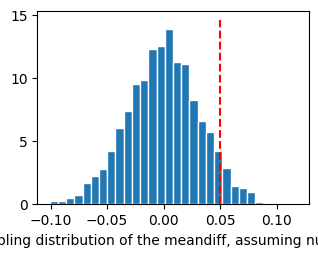

In [80]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
count, bins1, ignored = ax.hist(mean_diff_data, 30, density=True, edgecolor='white')
ax.set_xlabel('Sampling distribution of the meandiff, assuming null is true')
ylim = plt.gca().get_ylim()
plt.plot([pdiff_AB, pdiff_AB], ylim, '--r')

We have now produced a null hypothesis sampling distribution!

In [59]:
pdiff_AB #diff between mean proportion

0.04999999999999999

In [71]:
p_all = (132 + 228)/1000 # overall proportion of the two sample, is used to approximate population proportion

The sd of the sampling distribution of the group difference is calculated as follows:
1) it approximates the sd of the original population

2) $\sigma$ <sub>A-B</sub> = sqrt( (p_overall * (1-p_overall))/N<sub>A</sub> +  (p_overall * (1-p_overall))/N<sub>B</sub>)

$\sigma_{A-B} = \sqrt{\frac{p_{\text{overall}} \cdot (1 - p_{\text{overall}})}{N_A} + \frac{p_{\text{overall}} \cdot (1 - p_{\text{overall}})}{N_B}}$

In the confidence interval calculation, we used P<sub>A</sub> and P<sub>B</sub>, however, in this case we want to use the proportion assuming the null hypothesis is true.

In [73]:
# we know that the mean difference is centered at 0, and the sd of the sampling distribution of the difference is equal to:
sd_diff = np.sqrt( (p_all*(1-p_all)/400) + (p_all*(1-p_all)/600))
sd_diff

0.030983866769659335

In [62]:
np.std(mean_diff_data) # indeed its is close to the actual  

0.031572190709898834

In [67]:
alpha = 0.05
critical_value_at_alpha =  norm.ppf(.95, loc = 0, scale = 1)

In [74]:
z_statistic = (pdiff_AB - 0) / sd_diff
z_statistic

1.6137430609197567

In [76]:
print(norm.cdf(-z_statistic, loc = 0, scale = 1))

0.05329158478744383


p = 0.053, which is not less than alpha = 0.05, so we fail to reject the null hypothesis

# Bridging hypothesis testing and confidence intervals

Suppose we have two groups M and F and we estimated the 90% confidence interval of the difference to be (0.004, 0.176), what is the p-value for the difference between group M and F? 

H<sub>0</sub>: p<sub>M</sub> - p<sub>F</sub> = 0 <br>
H<sub>1</sub>: p<sub>M</sub> - p<sub>F</sub> != 0

This is the logic:
1) We assume that 90% of the interval (0.004, 0.176) will contain the true population parameter. (definition of 90% CI)
2) To calculate the p-value, what is the probability that 90% CI contains the population parameter, if the null hypothesis is true.
3) which means we are saying if the 90% CI interval contains 0, then the pvalue is 0.90
4) if the interval does not contain 0, then the pvalue = 0.10 (two tailed)

In this case, we reject the null hypothesis.

In [93]:
1-norm.cdf(2.8, loc = 0, scale =1)
        

0.0025551303304279793